<div align="center">
<h1>In The Name Of GOD</h1>
</div>

# HW1 - Data Mining - Notebook 1

## 1. Overfitting

### 1.1. Importing Libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

### Read the data from the file `IMDB-Movie-Data.csv` and store it in a pandas DataFrame.

From the information of the DataFrame, we can see that the `Revenue (Millions)` and `Metascore` columns have missing values. We can fill the missing values with the mean of the column.


In [2]:
df = pd.read_csv("data/IMDB-Movie-Data.csv") 

df.head(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


### Finding rows with two or more missing values. 

We can see that there are 30 rows with two or more missing values. I've printed the first 5 rows of the result. next we can drop these rows.

In [4]:
target_rows = df[df.isnull().sum(axis=1) >= 2]

print(target_rows.shape)
target_rows.head(5)

(30, 12)


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
25,26,Paris pieds nus,Comedy,Fiona visits Paris for the first time to assis...,Dominique Abel,"Fiona Gordon, Dominique Abel,Emmanuelle Riva, ...",2016,83,6.8,222,NaN,NaN
39,40,5- 25- 77,"Comedy,Drama","Alienated, hopeful-filmmaker Pat Johnson's epi...",Patrick Read Johnson,"John Francis Daley, Austin Pendleton, Colleen ...",2007,113,7.1,241,NaN,NaN
42,43,Don't Fuck in the Woods,Horror,A group of friends are going on a camping trip...,Shawn Burkett,"Brittany Blanton, Ayse Howard, Roman Jossart,N...",2016,73,2.7,496,NaN,NaN
47,48,Fallen,"Adventure,Drama,Fantasy",A young girl finds herself in a reform school ...,Scott Hicks,"Hermione Corfield, Addison Timlin, Joely Richa...",2016,91,5.6,5103,NaN,NaN
103,104,Contratiempo,"Crime,Mystery,Thriller",A young businessman faces a lawyer trying to p...,Oriol Paulo,"Mario Casas, Ana Wagener, José Coronado, Bárba...",2016,106,7.9,7204,NaN,NaN


#### Drop the rows with two or more missing values.

In [5]:
df.drop(target_rows.index, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 970 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                970 non-null    int64  
 1   Title               970 non-null    object 
 2   Genre               970 non-null    object 
 3   Description         970 non-null    object 
 4   Director            970 non-null    object 
 5   Actors              970 non-null    object 
 6   Year                970 non-null    int64  
 7   Runtime (Minutes)   970 non-null    int64  
 8   Rating              970 non-null    float64
 9   Votes               970 non-null    int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 98.5+ KB


### Replacing the missing values of the `Revenue (Millions)` column with the mean of the column.

In the following code, we can see that the `Revenue (Millions)` column has no missing values anymore.

In [6]:
df['Revenue (Millions)'].fillna(df['Revenue (Millions)'].mean(), inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 970 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                970 non-null    int64  
 1   Title               970 non-null    object 
 2   Genre               970 non-null    object 
 3   Description         970 non-null    object 
 4   Director            970 non-null    object 
 5   Actors              970 non-null    object 
 6   Year                970 non-null    int64  
 7   Runtime (Minutes)   970 non-null    int64  
 8   Rating              970 non-null    float64
 9   Votes               970 non-null    int64  
 10  Revenue (Millions)  970 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 98.5+ KB


### Sorting the DataFrame by the `Rating` column and correcting the rank of the rows.

After sorting the DataFrame by the `Rating` column, we can see that the rank of the rows is not correct. We can correct the rank of the rows by using the `reset_index` method or by using the `sort_values` method with the `ascending=False` parameter.

In [7]:
# Sort the dataframe by the 'Rating' column in descending order
df.sort_values(by='Rating', ascending=False, inplace=True)

df.head(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
80,81,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
117,118,Dangal,"Action,Biography,Drama",Former wrestler Mahavir Singh Phogat and his t...,Nitesh Tiwari,"Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,...",2016,161,8.8,48969,11.15,NaN
36,37,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
96,97,Kimi no na wa,"Animation,Drama,Fantasy",Two strangers find themselves linked in a biza...,Makoto Shinkai,"Ryûnosuke Kamiki, Mone Kamishiraishi, Ryô Nari...",2016,106,8.6,34110,4.68,79.0
249,250,The Intouchables,"Biography,Comedy,Drama",After he becomes a quadriplegic from a paragli...,Olivier Nakache,"François Cluzet, Omar Sy, Anne Le Ny, Audrey F...",2011,112,8.6,557965,13.18,57.0
133,134,Whiplash,"Drama,Music",A promising young drummer enrolls at a cut-thr...,Damien Chazelle,"Miles Teller, J.K. Simmons, Melissa Benoist, P...",2014,107,8.5,477276,13.09,88.0
99,100,The Departed,"Crime,Drama,Thriller",An undercover cop and a mole in the police att...,Martin Scorsese,"Leonardo DiCaprio, Matt Damon, Jack Nicholson,...",2006,151,8.5,937414,132.37,85.0
124,125,The Dark Knight Rises,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13,78.0
476,477,The Lives of Others,"Drama,Thriller","In 1984 East Berlin, an agent of the secret po...",Florian Henckel von Donnersmarck,"Ulrich Mühe, Martina Gedeck,Sebastian Koch, Ul...",2006,137,8.5,278103,11.28,89.0


In the cell below we are filling the new ranks in the `Rank` column of the DataFrame with the numerical data rank along axis. Equal values are assigned a rank that is the average of the ranks of those values.

In [8]:
# Filling the new rank column with the sorted values
df['Rank'] = df['Rating'].rank(ascending=False)

df.head(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
54,1.0,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
80,2.5,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
117,2.5,Dangal,"Action,Biography,Drama",Former wrestler Mahavir Singh Phogat and his t...,Nitesh Tiwari,"Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,...",2016,161,8.8,48969,11.15,NaN
36,5.0,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
96,5.0,Kimi no na wa,"Animation,Drama,Fantasy",Two strangers find themselves linked in a biza...,Makoto Shinkai,"Ryûnosuke Kamiki, Mone Kamishiraishi, Ryô Nari...",2016,106,8.6,34110,4.68,79.0
249,5.0,The Intouchables,"Biography,Comedy,Drama",After he becomes a quadriplegic from a paragli...,Olivier Nakache,"François Cluzet, Omar Sy, Anne Le Ny, Audrey F...",2011,112,8.6,557965,13.18,57.0
133,9.5,Whiplash,"Drama,Music",A promising young drummer enrolls at a cut-thr...,Damien Chazelle,"Miles Teller, J.K. Simmons, Melissa Benoist, P...",2014,107,8.5,477276,13.09,88.0
99,9.5,The Departed,"Crime,Drama,Thriller",An undercover cop and a mole in the police att...,Martin Scorsese,"Leonardo DiCaprio, Matt Damon, Jack Nicholson,...",2006,151,8.5,937414,132.37,85.0
124,9.5,The Dark Knight Rises,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13,78.0
476,9.5,The Lives of Others,"Drama,Thriller","In 1984 East Berlin, an agent of the secret po...",Florian Henckel von Donnersmarck,"Ulrich Mühe, Martina Gedeck,Sebastian Koch, Ul...",2006,137,8.5,278103,11.28,89.0


### Filling missing values in the `Metascore` column with the mean of the column.

In the cell below we can see that the `Metascore` column has no missing values anymore.

In [9]:
df['Metascore'].fillna(df['Metascore'].mean(), inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 970 entries, 54 to 829
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                970 non-null    float64
 1   Title               970 non-null    object 
 2   Genre               970 non-null    object 
 3   Description         970 non-null    object 
 4   Director            970 non-null    object 
 5   Actors              970 non-null    object 
 6   Year                970 non-null    int64  
 7   Runtime (Minutes)   970 non-null    int64  
 8   Rating              970 non-null    float64
 9   Votes               970 non-null    int64  
 10  Revenue (Millions)  970 non-null    float64
 11  Metascore           970 non-null    float64
dtypes: float64(4), int64(3), object(5)
memory usage: 98.5+ KB


### Normalizing the data in the `Metascore` column and reporting the mean and standard deviation of the column before and after normalization.

as we can see the mean and standard deviation of the column after normalization is approx. 0 and 1 respectively and the mean and standard deviation of the column before normalization is approx. 59 and 17 respectively which is a big difference between the two.

In [10]:
print("Mean before normalization: ", df['Metascore'].mean())
print("Standard deviation before normalization: ", df['Metascore'].std())

scaler = StandardScaler()
df['Metascore'] = scaler.fit_transform(df['Metascore'].values.reshape(-1, 1))

print("Mean after normalization: ", df['Metascore'].mean())
print("Standard deviation after normalization: ", df['Metascore'].std())

Mean before normalization:  58.98504273504268
Standard deviation before normalization:  16.890400990274653
Mean after normalization:  4.0746329563562443e-17
Standard deviation after normalization:  1.0005158628148114


### Finding the Number of movies that Christopher Nolan directed

In [11]:
christopher_nolan_movies = df[df['Director'] == 'Christopher Nolan']

christopher_nolan_movies.head(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
54,1.0,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,1.363309
80,2.5,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,0.889423
36,5.0,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,0.889423
124,9.5,The Dark Knight Rises,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13,1.126366
64,9.5,The Prestige,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,0.415536


### Finding the Number of movies that has a rating greater than 8.4 and smaller than 8.6

In [12]:
target_movies = df[(df['Rating'] >= 8.4) & (df['Rating'] <= 8.6)]

target_movies.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
36,5.0,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,0.889423
96,5.0,Kimi no na wa,"Animation,Drama,Fantasy",Two strangers find themselves linked in a biza...,Makoto Shinkai,"Ryûnosuke Kamiki, Mone Kamishiraishi, Ryô Nari...",2016,106,8.6,34110,4.68,1.185601
249,5.0,The Intouchables,"Biography,Comedy,Drama",After he becomes a quadriplegic from a paragli...,Olivier Nakache,"François Cluzet, Omar Sy, Anne Le Ny, Audrey F...",2011,112,8.6,557965,13.18,-0.117586
133,9.5,Whiplash,"Drama,Music",A promising young drummer enrolls at a cut-thr...,Damien Chazelle,"Miles Teller, J.K. Simmons, Melissa Benoist, P...",2014,107,8.5,477276,13.09,1.718723
99,9.5,The Departed,"Crime,Drama,Thriller",An undercover cop and a mole in the police att...,Martin Scorsese,"Leonardo DiCaprio, Matt Damon, Jack Nicholson,...",2006,151,8.5,937414,132.37,1.541016


### Plotting the scatter plot of the `Rating` and `Metascore` columns

<AxesSubplot:title={'center':'IMDB Score vs Metascore'}, xlabel='Metascore', ylabel='Rating'>

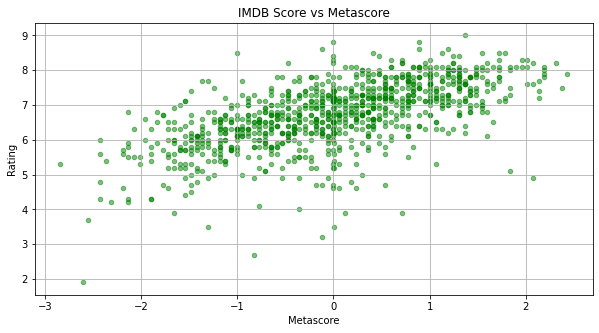

In [13]:
df.plot(x='Metascore', y='Rating', kind='scatter', title='IMDB Score vs Metascore', figsize=(10, 5), color='green', alpha=0.5, grid=True)

### Finding all the movies before 2013, shorter than 100 minutes, but longer than 85 minutes.

In [14]:
target_movies = df[(df['Year'] < 2013) & (df['Runtime (Minutes)'] > 85) & (df['Runtime (Minutes)'] < 100)]

target_movies.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
634,14.5,WALL·E,"Animation,Adventure,Family","In the distant future, a small waste-collectin...",Andrew Stanton,"Ben Burtt, Elissa Knight, Jeff Garlin, Fred Wi...",2008,98,8.4,776897,223.810000,0.000000
499,20.0,Up,"Animation,Adventure,Comedy",Seventy-eight year old Carl Fredricksen travel...,Pete Docter,"Edward Asner, Jordan Nagai, John Ratzenberger,...",2009,96,8.3,722203,292.980000,1.718723
772,46.0,How to Train Your Dragon,"Animation,Action,Adventure",A hapless young Viking who aspires to hunt dra...,Dean DeBlois,"Jay Baruchel, Gerard Butler,Christopher Mintz-...",2010,98,8.1,523893,217.390000,0.889423
695,46.0,Hachi: A Dog's Tale,"Drama,Family",A college professor's bond with the abandoned ...,Lasse Hallström,"Richard Gere, Joan Allen, Cary-Hiroyuki Tagawa...",2009,93,8.1,177602,82.956376,0.119358
598,88.5,Moon,"Drama,Mystery,Sci-Fi",Astronaut Sam Bell has a quintessentially pers...,Duncan Jones,"Sam Rockwell, Kevin Spacey, Dominique McElligo...",2009,97,7.9,277123,5.010000,0.474772


# Thanks for reading my notebook :)